# Installing the required packages

In [ ]:
pip install ucimlrepo

In [ ]:
pip install pandas

In [ ]:
pip install seaborn

In [ ]:
pip install -U scikit-learn

In [ ]:
pip install numpy

In [ ]:
!pip install --upgrade scikit-learn

In [32]:
# importing pandas
import pandas as pd

# loading the dataset
dataset = "NHANES_age_prediction.csv"
df = pd.read_csv(dataset)
print("Dataset loaded!")

Dataset loaded!


# DATA PREPARATION

# 1. Characterization of the Dataset

In [ ]:
# display basic information about the dataset
print("\nDataset size(Rows and Columns):\n", df.shape)
print("\nNumber of missing values:\n", df.isnull().sum())
print("\nUnique characteristics of the dataset:\n", df.describe(include='all').transpose())
print("\nDataset structure:")
df.info()

# 2. Data Cleaning and Exploratory Data Analysis(EDA)



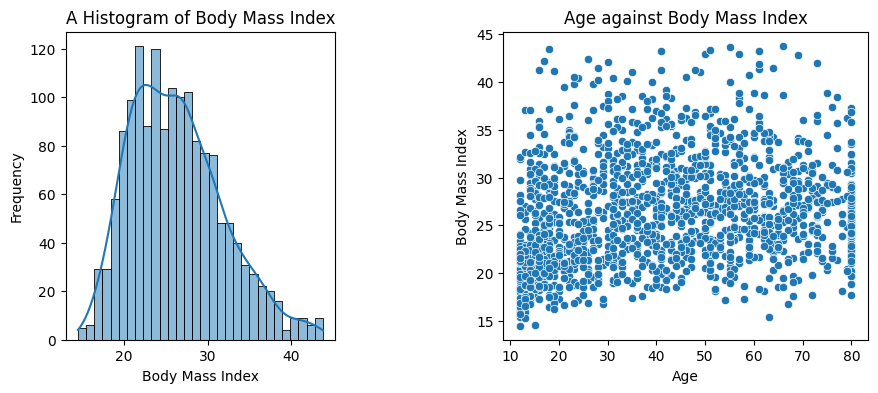

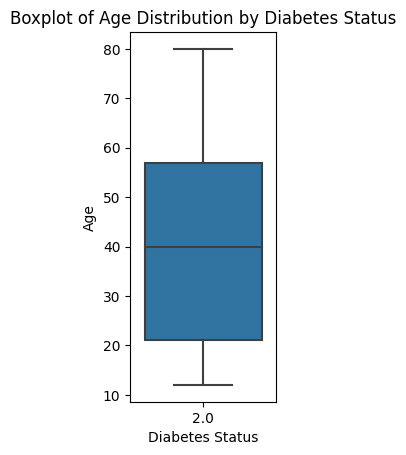

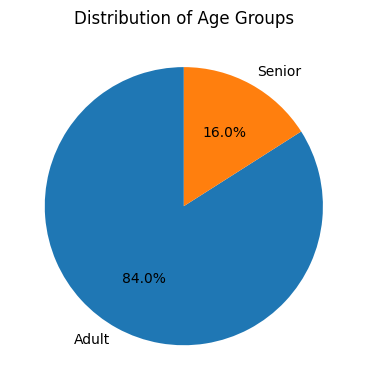

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# (i) DATA CLEANING
# handling missing values
data_cleaned = df.dropna()

# handling duplicates
data_cleaned = data_cleaned.drop_duplicates()

# handling outliers
numeric_columns = data_cleaned.select_dtypes(include=np.number).columns
Q1 = np.percentile(data_cleaned[numeric_columns], 25, axis=0)
Q3 = np.percentile(data_cleaned[numeric_columns], 75, axis=0)
IQR = Q3 - Q1

# use align to avoid reindexing warning
data_cleaned = data_cleaned[~((data_cleaned[numeric_columns] < (Q1 - 1.5 * IQR)) | (data_cleaned[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]


# (ii) EXPLORATORY DATA ANALYSIS
# scatter plot
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 2)
sns.scatterplot(x='Age', y='Body Mass Index', data= data_cleaned.rename(columns={'RIDAGEYR': 'Age', 'BMXBMI': 'Body Mass Index'}))
plt.title('Age against Body Mass Index')

# histogram
plt.subplot(1, 4, 1)
sns.histplot(data_cleaned['BMXBMI'], bins=30, kde=True)
plt.title('A Histogram of Body Mass Index')
plt.xlabel('Body Mass Index')
plt.ylabel('Frequency')
plt.show()


# boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x='DIQ010', y='RIDAGEYR', data=data_cleaned)
plt.title('Boxplot of Age Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Age')
plt.show()


# given that 'age_group' is a categorical variable
age_group_distribution = df['age_group'].value_counts()

# plotting a pie chart
plt.figure(figsize=(6, 4))
plt.pie(age_group_distribution, labels=age_group_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Age Groups')

plt.tight_layout()
plt.show()

# 3. Encoding, Scaling, and Feature Engineering

In [56]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# encoding categorical variables
label_encoder = LabelEncoder()
data_cleaned['encoded_column'] = label_encoder.fit_transform(data_cleaned['age_group'])

# scaling numerical features
scaler = StandardScaler()
data_cleaned['scaled_column'] = scaler.fit_transform(data_cleaned[['RIDAGEYR']])

# feature engineering
data_cleaned['new_feature'] = data_cleaned['RIDAGEYR'] * data_cleaned['BMXBMI']

print(data_cleaned)

         SEQN age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  \
0     73564.0     Adult      61.0       2.0     2.0    35.7   110.0     2.0   
1     73568.0     Adult      26.0       2.0     2.0    20.3    89.0     2.0   
2     73576.0     Adult      16.0       1.0     2.0    23.2    89.0     2.0   
3     73577.0     Adult      32.0       1.0     2.0    28.9   104.0     2.0   
5     73581.0     Adult      50.0       1.0     2.0    23.6   110.0     2.0   
...       ...       ...       ...       ...     ...     ...     ...     ...   
2272  83707.0     Adult      18.0       1.0     2.0    22.5    98.0     2.0   
2273  83711.0     Adult      38.0       2.0     2.0    33.5   100.0     2.0   
2275  83713.0     Adult      34.0       1.0     2.0    23.7   103.0     2.0   
2276  83718.0     Adult      60.0       2.0     2.0    27.4    90.0     2.0   
2277  83727.0     Adult      26.0       1.0     2.0    24.5   108.0     2.0   

      LBXGLT  LBXIN  encoded_column  scaled_column 


# 4. Dimensionality Reduction

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


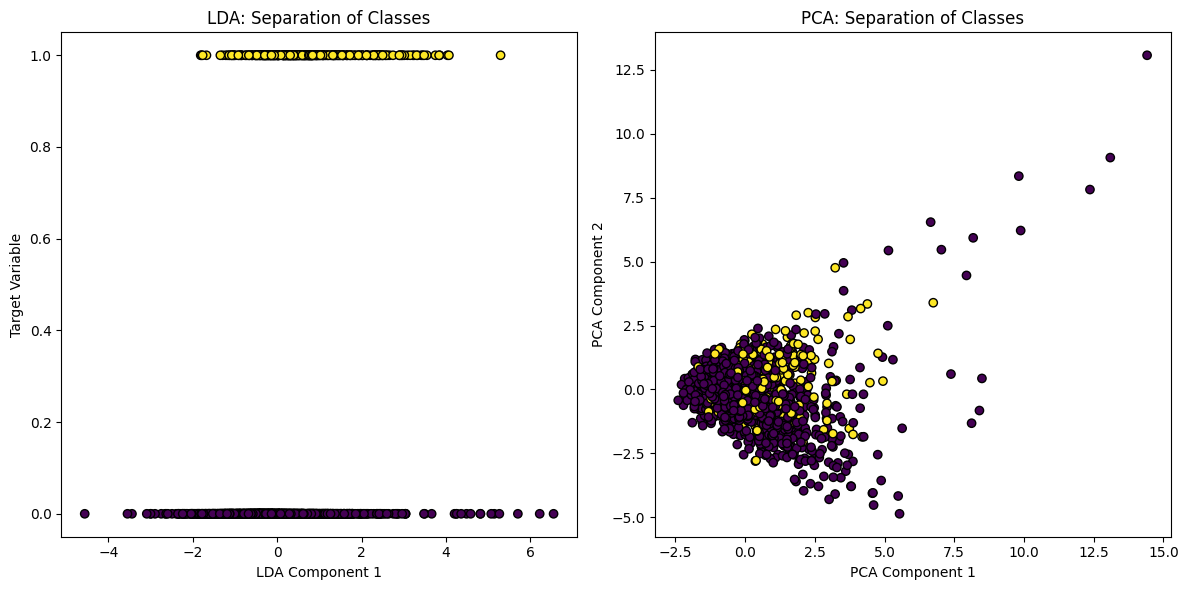

In [57]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# load the dataset
dataset = fetch_ucirepo(id=887)

X = dataset.data.features
y = dataset.data.targets

# convert string labels to numerical values using LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# standardizing the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_standardized, y_encoded)

# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# visualizing the separation of classes
plt.figure(figsize=(12, 6))

# LDA Visualization
plt.subplot(1, 2, 1)
plt.scatter(X_lda, y_encoded, c=y_encoded, cmap='viridis', edgecolor='k')
plt.title('LDA: Separation of Classes')
plt.xlabel('LDA Component 1')
plt.ylabel('Target Variable')

# PCA Visualization
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='viridis', edgecolor='k')
plt.title('PCA: Separation of Classes')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()


# MACHINE LEARNING
# 1. Choice of Machine Learning Approach

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo

# fetch dataset
dataset = fetch_ucirepo(id=887)

# dataset to dataframe
X = dataset.data.features
y = dataset.data.targets

# checking the characteristics of the dataset
num_classes = len(set(y))
num_samples, num_features = X.shape

# determining if it's a classification or regression problem
task_type = "Classification" if num_classes <= 2 else "Multiclass Classification"

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# choice of machine learning approach
if task_type == "Classification":
    # supervised learning is appropriate for classification tasks
    print("Chosen Machine Learning Approach: Supervised Learning (Classification)")

    # consider using algorithms like Logistic Regression, Random Forest, or Support Vector Machines
    print("Selected Classification Algorithms: Logistic Regression, Random Forest, Support Vector Machines")
else:
    # for regression tasks, supervised learning is appropriate
    print("Chosen Machine Learning Approach: Supervised Learning (Regression)")

    # consider using algorithms like Linear Regression, Random Forest Regression, or Gradient Boosting
    print("Selected Regression Algorithms: Linear Regression, Random Forest Regression, Gradient Boosting")

Chosen Machine Learning Approach: Supervised Learning (Classification)
Selected Classification Algorithms: Logistic Regression, Random Forest, Support Vector Machines


# 2. Feature Selection and Hyperparameter Tuning

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.2, random_state=42)

# feature selection using Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# display feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values('Importance', ascending=False)
print("Feature Importances:")
print(feature_importances)

# select top N features based on importance
top_n_features = 5
selected_features = feature_importances.head(top_n_features)['Feature'].tolist()

# use only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

classifier = RandomForestClassifier()

grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_selected, y_train)

# getting the best parameters
best_params = grid_search.best_params_
print("\nBest Hyperparameters:")
print(best_params)

# obtaining the best accuracy using optimal hyperparameter values on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nBest Model Accuracy on Test Set: {accuracy:.4f}")

Feature Importances:
    Feature  Importance
5    LBXGLT    0.271983
6     LBXIN    0.247337
2    BMXBMI    0.220592
3    LBXGLU    0.200730
0  RIAGENDR    0.024993
1    PAQ605    0.019708
4    DIQ010    0.014657

Best Hyperparameters:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

Best Model Accuracy on Test Set: 0.8377


# 3. Training and Testing

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.cluster import KMeans

# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.2, random_state=42)

# Supervised Learning
classifier = RandomForestClassifier(n_estimators=100, max_depth=10)
classifier.fit(X_train, y_train)

# predictions on the test set
y_pred = classifier.predict(X_test)

# evaluating the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Supervised Learning Accuracy: {accuracy:.4f}")

# Unsupervised Learning
# K-Means clustering
kmeans = KMeans(n_clusters=2, n_init=10)
X_clustered = kmeans.fit_predict(X)

# evaluating the clustering using silhouette score
silhouette_avg = silhouette_score(X, X_clustered)
print(f"Unsupervised Learning (K-Means) Silhouette Score: {silhouette_avg:.4f}")

# K-Fold Cross-Validation
num_folds = 5  # number of folds based on our dataset

# Supervised Learning Cross-Validation
cv_accuracy = cross_val_score(classifier, X, y.values.ravel(), cv=num_folds, scoring='accuracy')
print(f"\nSupervised Learning Cross-Validation Accuracy (Mean): {cv_accuracy.mean():.4f}")

# Unsupervised Learning Cross-Validation
# K-Means clustering
cv_clustered = cross_val_predict(kmeans, X, cv=KFold(n_splits=num_folds, shuffle=True, random_state=42))
cv_silhouette_scores = silhouette_score(X, cv_clustered)
print(f"Unsupervised Learning (K-Means) Cross-Validation Silhouette Score: {cv_silhouette_scores:.4f}")

Supervised Learning Accuracy: 0.8443
Unsupervised Learning (K-Means) Silhouette Score: 0.6066

Supervised Learning Cross-Validation Accuracy (Mean): 0.8437
Unsupervised Learning (K-Means) Cross-Validation Silhouette Score: 0.2192


# 4. Comparison and Visualization

                      Model/Method  Accuracy/Silhouette  Cross-Validation Mean
0              Supervised Learning             0.839912               0.843282
1  Unsupervised Learning (K-Means)             0.606594               0.606594


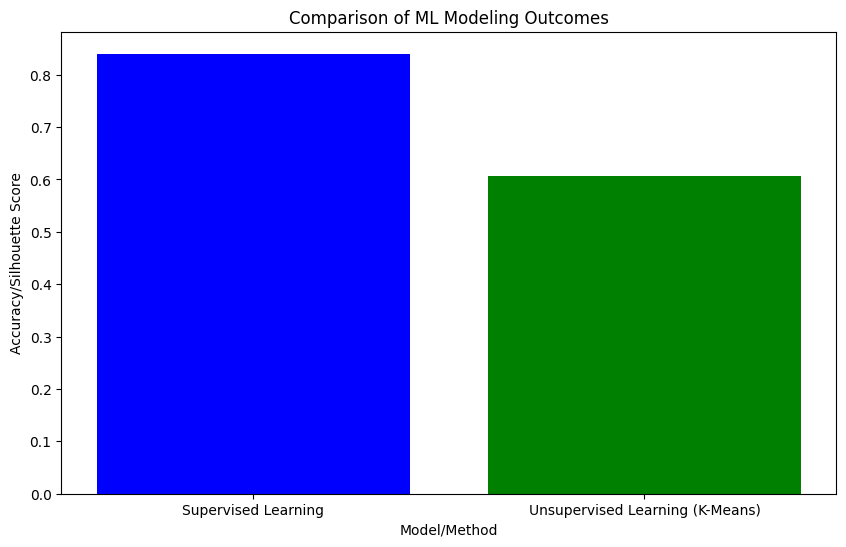

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score

# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.2, random_state=42)

# Supervised Learning
classifier = RandomForestClassifier(n_estimators=100, max_depth=10)
classifier.fit(X_train, y_train)

# predictions on the test set
y_pred = classifier.predict(X_test)

# evaluating the model using accuracy
supervised_accuracy = accuracy_score(y_test, y_pred)

# Unsupervised Learning
# K-Means clustering
kmeans = KMeans(n_clusters=2, n_init=10)  # Set n_init explicitly
X_clustered = kmeans.fit_predict(X)

# evaluating the clustering using silhouette score
unsupervised_silhouette = silhouette_score(X, X_clustered)

# K-Fold Cross-Validation
num_folds = 5  # number of folds based on our dataset

# Supervised Learning Cross-Validation
cv_accuracy = cross_val_score(classifier, X, y.values.ravel(), cv=num_folds, scoring='accuracy')
cv_accuracy_mean = cv_accuracy.mean()

# Unsupervised Learning Cross-Validation
# K-Means clustering
cv_clustered = KMeans(n_clusters=2, n_init=10).fit_predict(X)
cv_silhouette_scores = silhouette_score(X, cv_clustered)
cv_silhouette_mean = cv_silhouette_scores.mean()

# creating a dataframe for comparison
comparison_df = pd.DataFrame({
    'Model/Method': ['Supervised Learning', 'Unsupervised Learning (K-Means)'],
    'Accuracy/Silhouette': [supervised_accuracy, unsupervised_silhouette],
    'Cross-Validation Mean': [cv_accuracy_mean, cv_silhouette_mean]
})

# displaying the comparison table
print(comparison_df)

# creating a bar plot for visualization
plt.figure(figsize=(10, 6))
plt.bar(comparison_df['Model/Method'], comparison_df['Accuracy/Silhouette'], color=['blue', 'green'])
plt.xlabel('Model/Method')
plt.ylabel('Accuracy/Silhouette Score')
plt.title('Comparison of ML Modeling Outcomes')
plt.show()